In [ ]:
import numpy as np
import pandas as pd
import os
import skimage.io
import cv2

from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
#folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/TEST/NO'
#folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/TEST/YES'
#folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/VAL/NO'
#folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/VAL/YES'
folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/TRAIN/NO'
#folder = '/content/drive/MyDrive/Dataset_200/splitted_dataset/TRAIN/YES'

loaded = load_images_from_folder(folder)

In [ ]:
print(len(loaded))

80


In [ ]:
loaded_new = []
for i in range(80):
  #print(loaded[i].shape)
  res = cv2.resize(loaded[i], dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
  loaded_new.append(res)

In [ ]:
loaded_new = np.array(loaded_new)
loaded_new.shape

(80, 227, 227, 3)

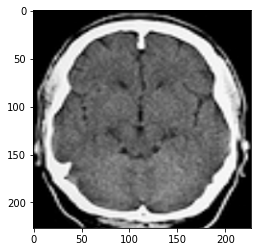

In [ ]:
plt.imshow(loaded_new[0])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

path = '/content/drive/MyDrive/Dataset_200/splitted_dataset/AUGMENTED/TRAIN/NO/'

datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')

x = loaded_new

i = 0
for batch in datagen.flow(x, batch_size=81, save_to_dir=path, save_prefix='aug', save_format='png'):
    i += 1
    if i > 10:
        break 


In [ ]:
aug_img = load_images_from_folder(path)
len(aug_img)

880

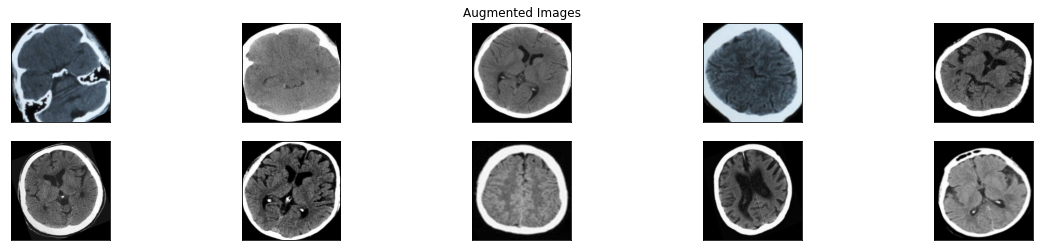

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n/2, i + 1)
    plt.imshow(aug_img[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2:
            ax.set_title('Augmented Images')
plt.show()